In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble  import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=['sepal-length','sepal-width','petal-length','petal-width','class'])
print(df)

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.sum()

sepal-length                                                876.5
sepal-width                                                 458.1
petal-length                                                563.8
petal-width                                                 179.8
class           Iris-setosaIris-setosaIris-setosaIris-setosaIr...
dtype: object

In [6]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

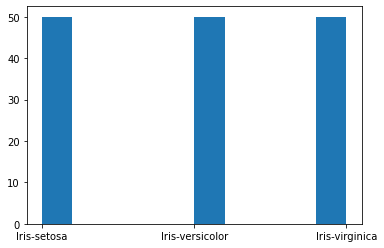

In [7]:
plt.hist(df['class'])
plt.show()

#DATA SPLITING

In [8]:
X = df.drop("class",axis=1)
Y = df["class"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,train_size = 0.8,random_state=60)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:10]

array([[ 0.60232117, -0.85178697,  0.81219442,  0.8644853 ],
       [ 0.60232117, -0.34950473,  0.24056198,  0.07057023],
       [ 0.48383176, -1.35406921,  0.64070469,  0.8644853 ],
       [-1.29350939,  0.15277752, -1.3028456 , -1.38494074],
       [-1.17501998,  0.15277752, -1.36000884, -1.51725992],
       [-1.17501998, -0.09836361, -1.41717209, -1.38494074],
       [-0.46408352, -1.85635145,  0.06907225,  0.07057023],
       [-0.93804116,  1.157342  , -1.41717209, -1.38494074],
       [-0.81955175, -0.85178697,  0.01190901,  0.20288941],
       [ 1.19476822,  0.15277752,  0.58354145,  0.33520859]])

# RandomForestClassifier

In [11]:
rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(X_train,Y_train)
pred_rfc = rfc.predict(X_test)
pred_rfc

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [12]:
print(classification_report(Y_test,pred_rfc))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.83      0.71      0.77         7

       accuracy                           0.90        30
      macro avg       0.88      0.87      0.88        30
   weighted avg       0.90      0.90      0.90        30



In [13]:
print(confusion_matrix(Y_test,pred_rfc))

[[13  0  0]
 [ 0  9  1]
 [ 0  2  5]]


# SVM Classifier

In [14]:
clf = SVC()
clf.fit(X_train,Y_train)
pred_svm = clf.predict(X_test)
print(classification_report(Y_test,pred_svm))
print(confusion_matrix(Y_test,pred_svm))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.83      0.71      0.77         7

       accuracy                           0.90        30
      macro avg       0.88      0.87      0.88        30
   weighted avg       0.90      0.90      0.90        30

[[13  0  0]
 [ 0  9  1]
 [ 0  2  5]]


# Neural Network

In [28]:
mlpc = MLPClassifier(max_iter=500)
mlpc.fit(X_train,Y_train)
pred_mlpc = mlpc.predict(X_test)
print(classification_report(Y_test,pred_mlpc))
print(confusion_matrix(Y_test,pred_mlpc))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.83      0.71      0.77         7

       accuracy                           0.90        30
      macro avg       0.88      0.87      0.88        30
   weighted avg       0.90      0.90      0.90        30

[[13  0  0]
 [ 0  9  1]
 [ 0  2  5]]


In [29]:
print(accuracy_score(Y_test,pred_rfc))
print(accuracy_score(Y_test,pred_svm))
print(accuracy_score(Y_test,pred_mlpc))

0.9
0.9
0.9


# Logistic Regression

In [32]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
pred_lr = lr.predict(X_test)
print(classification_report(Y_test,pred_lr))
print(confusion_matrix(Y_test,pred_lr))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.83      0.71      0.77         7

       accuracy                           0.90        30
      macro avg       0.88      0.87      0.88        30
   weighted avg       0.90      0.90      0.90        30

[[13  0  0]
 [ 0  9  1]
 [ 0  2  5]]


# Linear Discriminant Analysis

In [33]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
pred_lda = lda.predict(X_test)
print(classification_report(Y_test,pred_lda))
print(confusion_matrix(Y_test,pred_lda))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[13  0  0]
 [ 0 10  0]
 [ 0  1  6]]


# KFold

In [39]:
kfold = KFold(n_splits = 5,shuffle=True,random_state=60) 
rfc_result = cross_val_score(rfc,X_train,Y_train,cv=kfold,scoring='accuracy') 
print(rfc_result)

[1.         0.91666667 0.875      1.         1.        ]
